In [17]:
words = open("data.txt", encoding="utf-8").read().splitlines()
words = [i.strip() for i in words if i]

In [18]:
frequency = {}
for w in words:
    new_w = ["|"] + list(w) + ["|"] # these symbols for indicating start and end of word
    for ch1, ch2 in zip(new_w, new_w[1:]):
        bigram = (ch1, ch2)
        frequency[bigram] = frequency.get(bigram, 0) + 1

In [19]:
fr_sort = sorted(frequency.items(), key=lambda k: -k[1])

In [20]:
import torch

In [21]:
all_data = ''.join(words)
# getting the char library from data set
chars = sorted(list(set(all_data)))

stoi = {val:key+1 for key, val in enumerate(chars)}
stoi['|'] = 0
itos = {ind:st for st, ind in stoi.items()}

In [22]:
lib_count = len(chars) + 1
Count_Table = torch.zeros((lib_count, lib_count), dtype = torch.int32)

In [23]:
for w in words:
    new_w = ["|"] + list(w) + ["|"]
    for ch1, ch2 in zip(new_w, new_w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        Count_Table[ix1, ix2] += 1

(-0.5, 34.5, 34.5, -0.5)

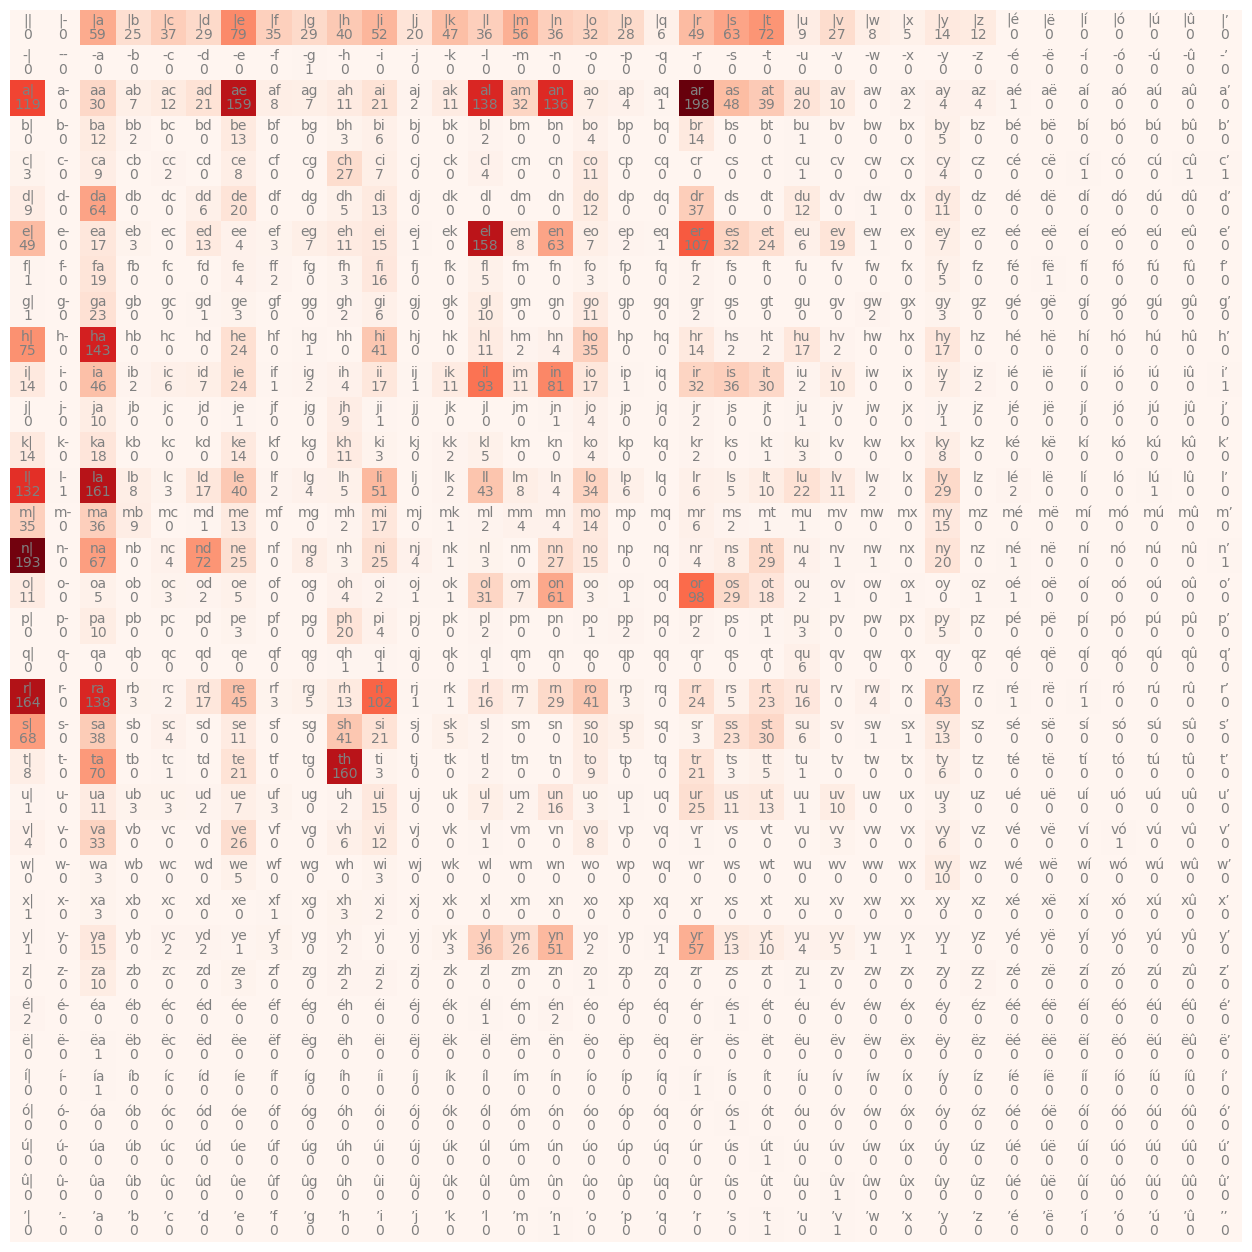

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(Count_Table, cmap='Reds')
for i in range(lib_count):
    for j in range(lib_count):
        couple = itos[i] + itos[j]
        plt.text(j, i, couple, ha="center", va="bottom", color="gray")
        plt.text(j, i, Count_Table[i,j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [25]:
Frequency_Table = Count_Table.float()
Frequency_Table /= Frequency_Table.sum(1, keepdim=True)
Frequency_Table

tensor([[0.0000, 0.0000, 0.0652,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1131, 0.0000, 0.0285,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [26]:
g = torch.Generator().manual_seed(412987498012)
torch.multinomial(Frequency_Table[0], num_samples=100, replacement=True, generator=g)

tensor([21, 23, 18, 19, 20,  7, 16,  7, 19, 20, 26, 14, 21,  9,  7,  6, 20, 20,
         4, 21,  2, 16, 21, 17, 13,  6, 26, 11,  3, 10,  9,  4,  6, 15, 16, 23,
        19,  5, 27, 14,  3, 13,  9, 17, 14,  7,  5,  6, 12, 21,  4, 19, 14, 17,
         4, 13,  7, 19, 21, 15,  7, 10,  4,  6, 23, 15, 10,  5, 16, 21, 13,  6,
         9,  6, 26,  6, 20, 21, 19, 21,  7,  6, 13, 21, 12,  4,  3, 19, 20, 27,
         2,  9, 23, 18, 12, 14, 14,  4, 20,  6])

In [27]:
max_len_of_words = max([len(w) for w in words]) + 1
lengths = torch.zeros(max_len_of_words, dtype = torch.int32)
for k, w in enumerate(words):
    lengths[len(w)] += 1

# frequency table of word lengths of data
len_frequency = lengths.float() / lengths.sum()

In [28]:
g = torch.Generator().manual_seed(412987498012)
w_lens = torch.multinomial(len_frequency, num_samples=5, replacement=True, generator=g)
for w_len in w_lens.data:

    ix = 0
    name = []
    i = w_len.item()
    while i != 0:
        prob_of_next_chat = Frequency_Table[ix]

        ix = torch.multinomial(
            prob_of_next_chat, num_samples=1, replacement=True, generator=g
            ).item()
        name.append(itos[ix])

        if ix == 0 and i - 1 != 0:
            name = []
            i = w_len.item()
        else : i -= 1

        
    print(''.join(name))

enarhisor
glalanolom
thapion|
narorond
rilthalda


In [29]:
# Testing the model
log_likelihood = 0.0
n = 0

for w in words:
    new_w = ["|"] + list(w) + ["|"]
    for ch1, ch2 in zip(new_w, new_w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = Frequency_Table[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1

neg_log_likelihood = -log_likelihood

print(f'{log_likelihood=}')
print(f'{neg_log_likelihood=}')
print(f'Normalized Likelihood (Loss): {neg_log_likelihood/n}')

log_likelihood=tensor(-17484.0957)
neg_log_likelihood=tensor(17484.0957)
Normalized Likelihood (Loss): 2.3576180934906006
